In [1]:
from map_generator import MapGenerator
import matplotlib.pyplot as plt
from Planners.abc.abc_problem import ABCProblem
from Planners.pso.pso_problem import PSOProblem
from Planners.gwo.gwo_problem import GWOProblem
from Planners.helper import linear_interpolation, cost_func
import numpy as np
from IPython.display import display, clear_output
import os

map_params\custom_map_1_params.yaml
(1000, 2000)


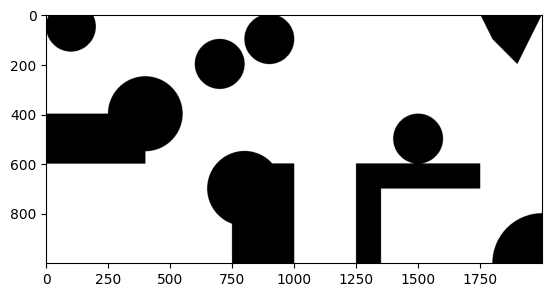

map_params\custom_map_2_params.yaml
(500, 500)


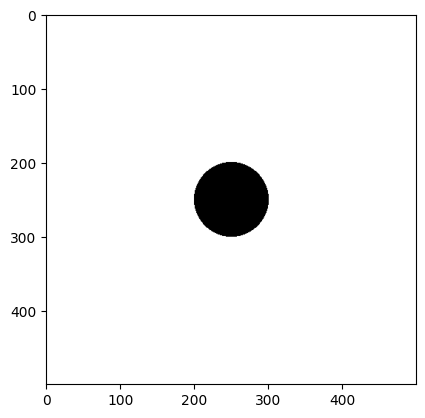

map_params\map_001_params.yaml
(1000, 1500)


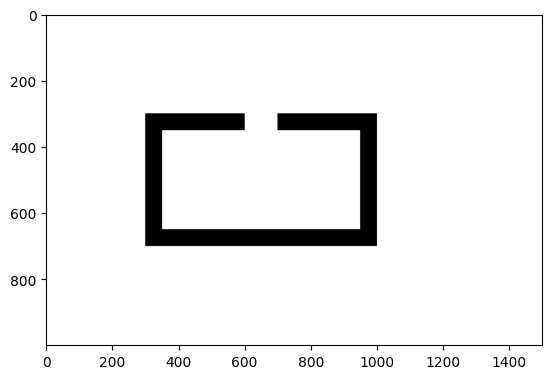

map_params\map_002_params.yaml
(1000, 1500)


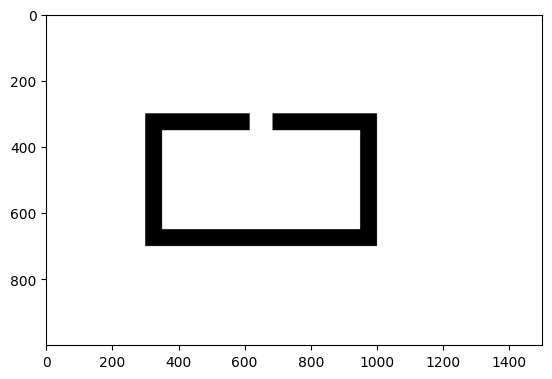

map_params\map_003_params.yaml
(1000, 1500)


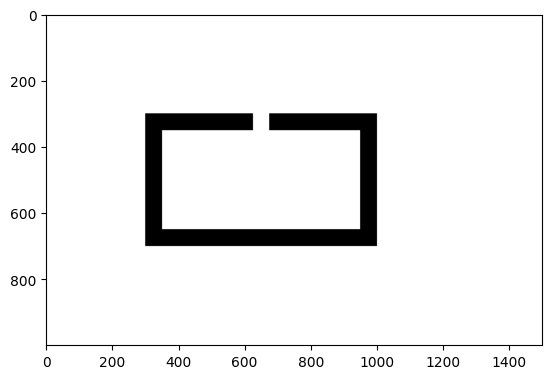

map_params\map_004_params.yaml
(1000, 1500)


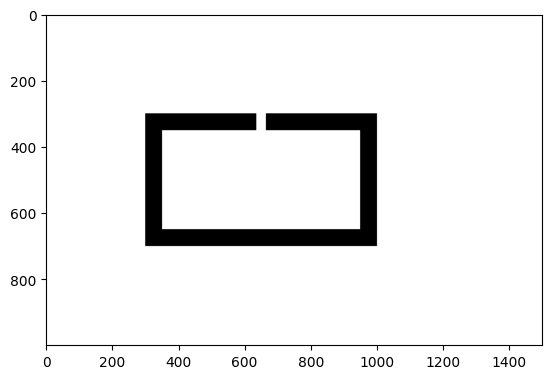

map_params\map_005_params.yaml
(2000, 2000)


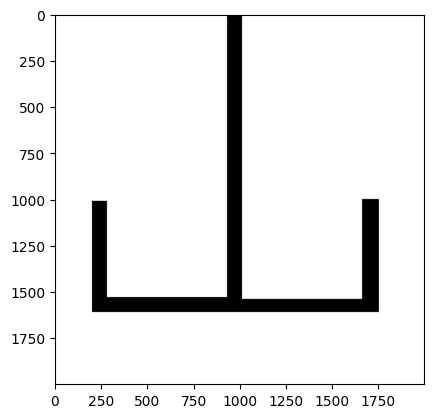

map_params\map_006_params.yaml
(3000, 3000)


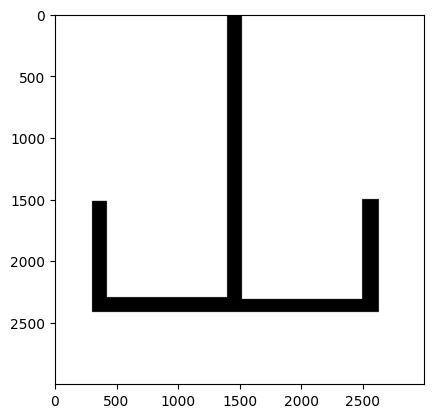

map_params\map_007_params.yaml
(2000, 2000)


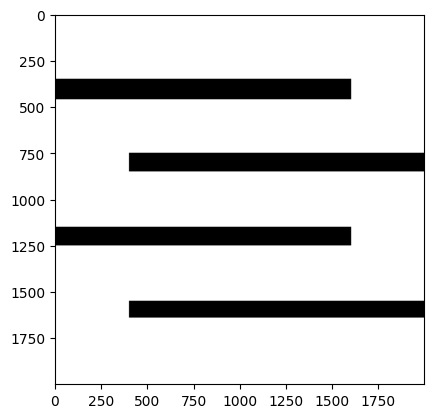

map_params\map_008_params.yaml
(2000, 2000)


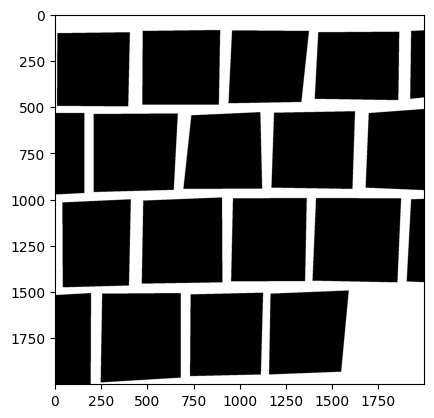

map_params\map_009_params.yaml
(2000, 2000)


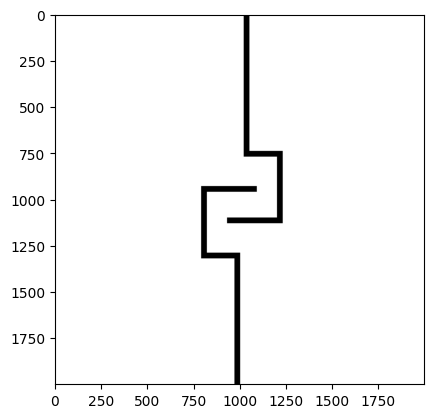

map_params\map_010_params.yaml
(2000, 2000)


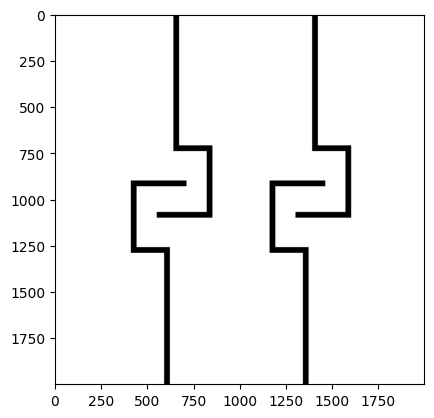

map_params\map_011_params.yaml
(2000, 2000)


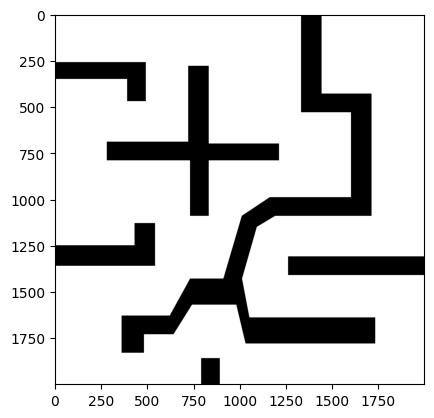

map_params\map_012_params.yaml
(2000, 2000)


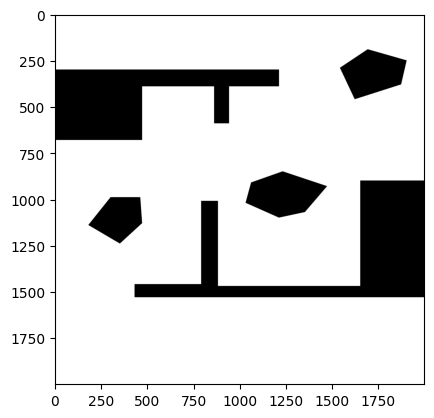

map_params\map_013_params.yaml
(2000, 2000)


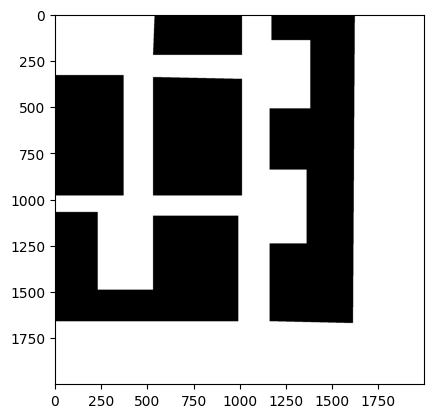

map_params\map_014_params.yaml
(3203, 3203)


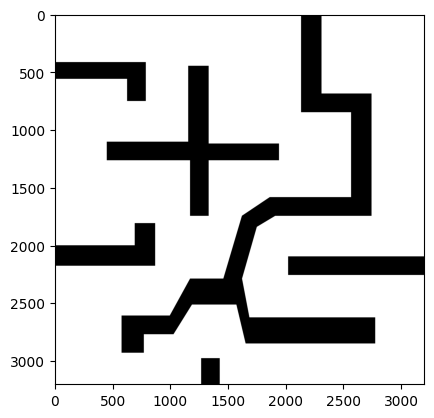

map_params\map_015_params.yaml
(2000, 2000)


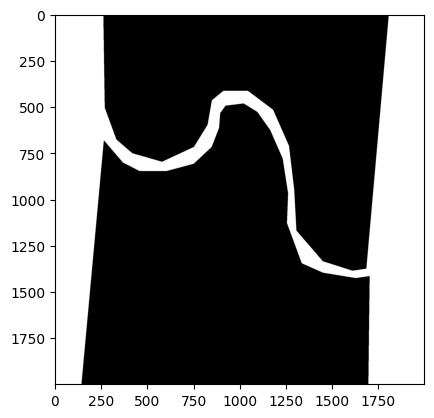

map_params\map_016_params.yaml
(2000, 2000)


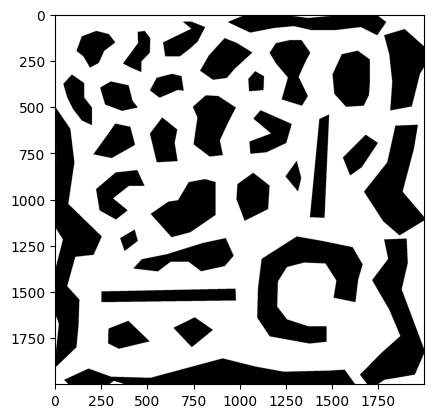

map_params\map_017_params.yaml
(2000, 2000)


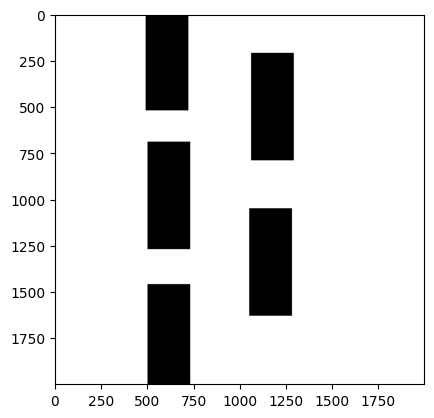

map_params\map_018_params.yaml
(2000, 2000)


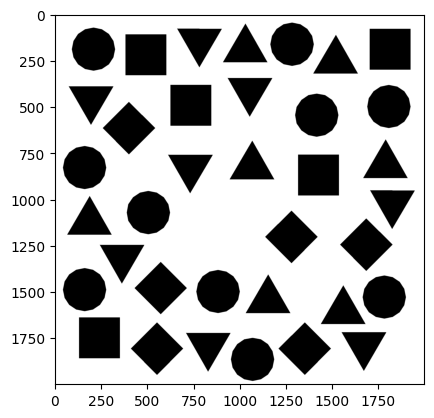

map_params\map_019_params.yaml
(3000, 2000)


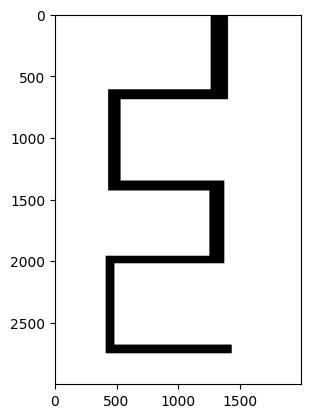

map_params\map_020_params.yaml
(4000, 4000)


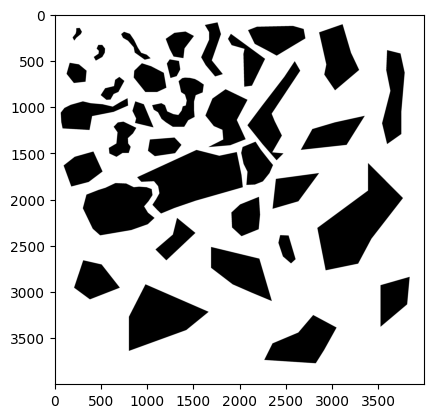

map_params\map_021_params.yaml
(2000, 2000)


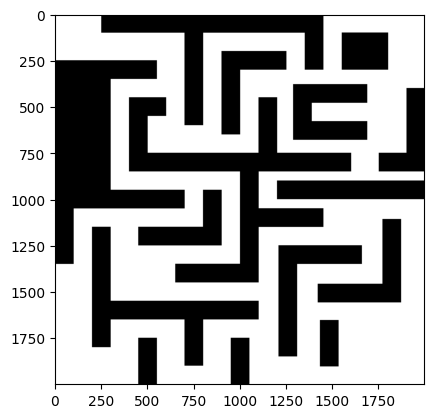

map_params\map_022_params.yaml
(2000, 2000)


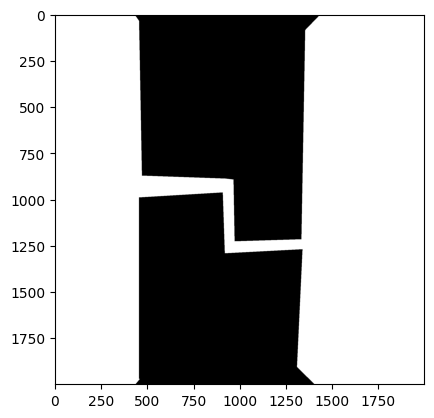

map_params\map_023_params.yaml
(2000, 2000)


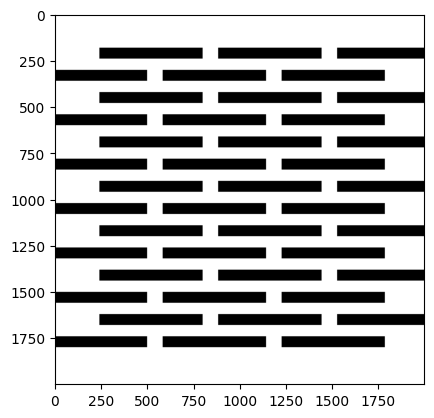

map_params\map_024_params.yaml
(2000, 2000)


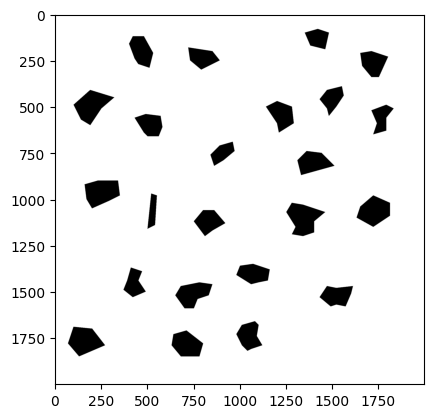

map_params\map_025_params.yaml
(2000, 2000)


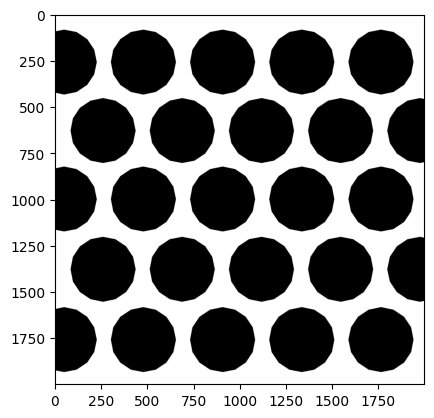

map_params\map_026_params.yaml
(2000, 2000)


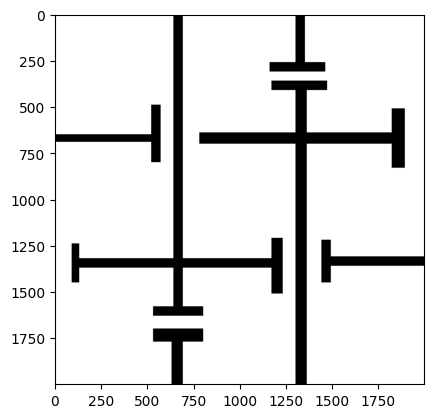

map_params\map_027_params.yaml
(2000, 2000)


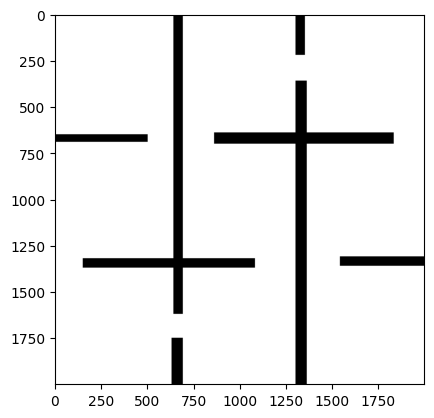

map_params\map_028_params.yaml
(2000, 2000)


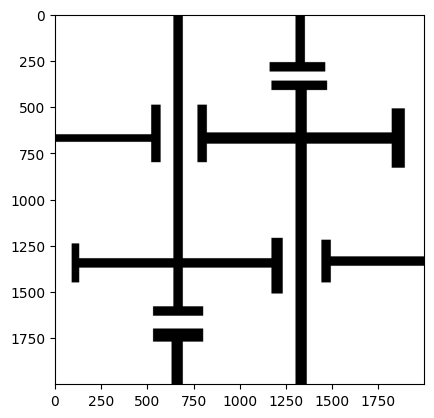

map_params\map_029_params.yaml
(970, 2830)


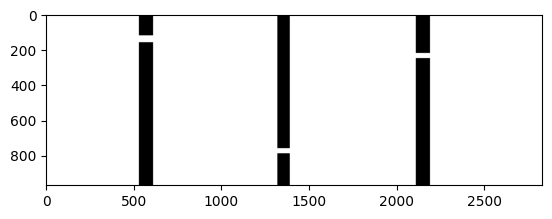

map_params\map_030_params.yaml
(970, 2830)


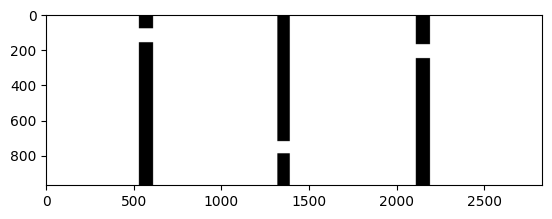

map_params\map_031_params.yaml
(2000, 2000)


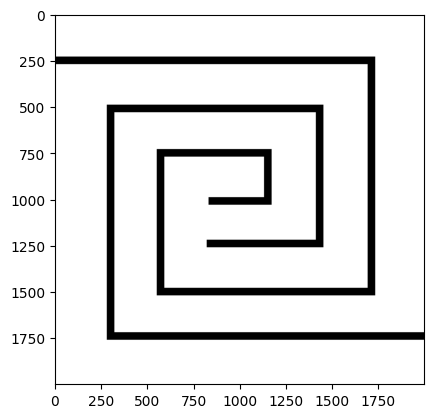

map_params\map_032_params.yaml
(2000, 2000)


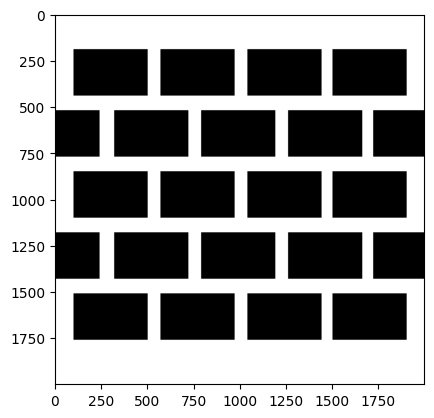

map_params\map_033_params.yaml
(2000, 2000)


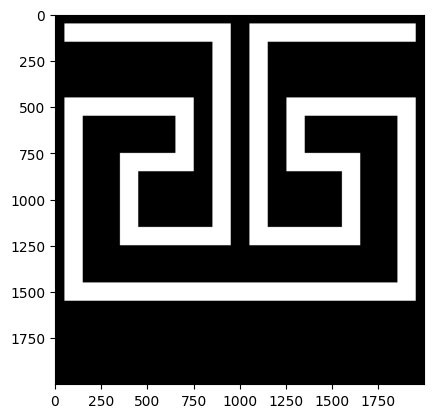

map_params\map_034_params.yaml
(3000, 3000)


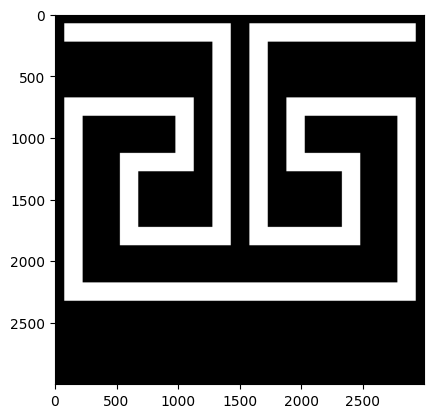

map_params\map_035_params.yaml
(4000, 4000)


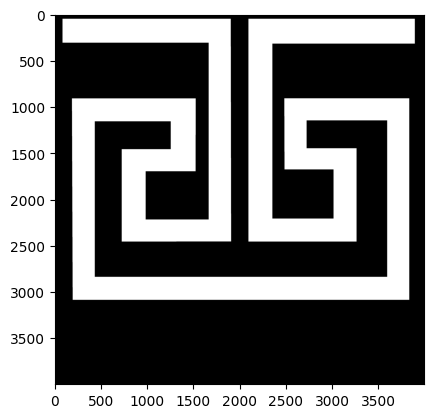

map_params\map_036_params.yaml
(2000, 2000)


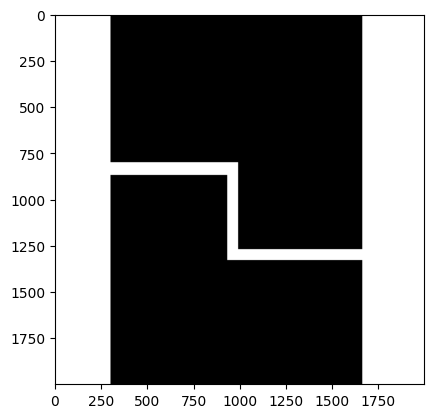

map_params\map_037_params.yaml
(2000, 2000)


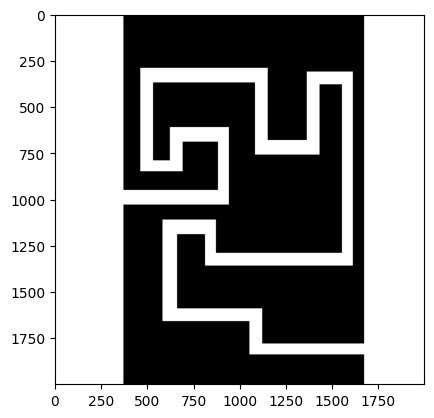

map_params\map_038_params.yaml
(2046, 2046)


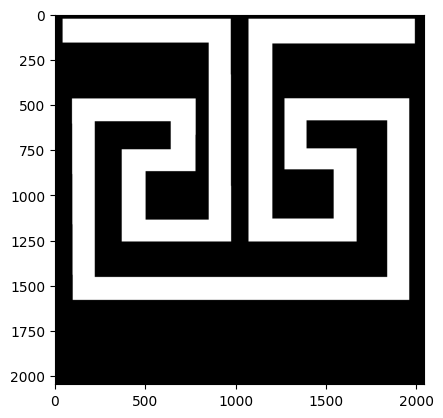

map_params\map_039_params.yaml
(2000, 2000)


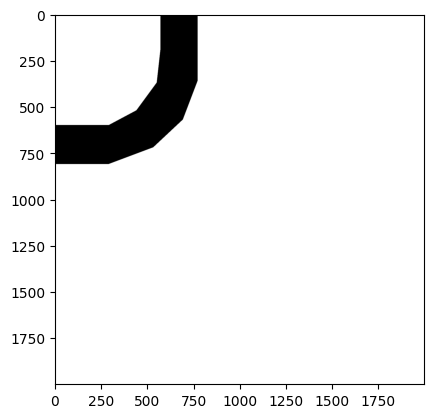

map_params\map_040_params.yaml
(2000, 2000)


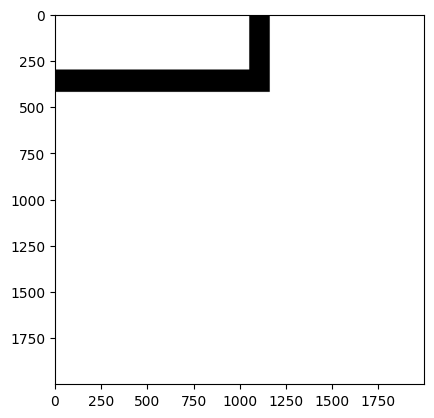

map_params\map_041_params.yaml
(2000, 2000)


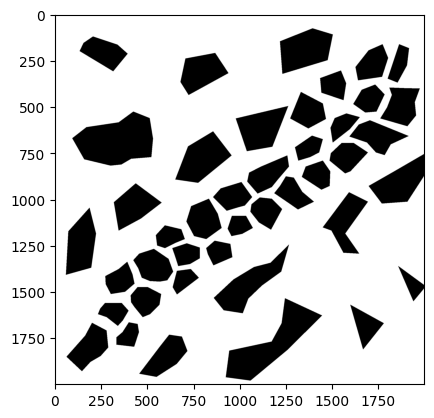

map_params\map_042_params.yaml
(2000, 2000)


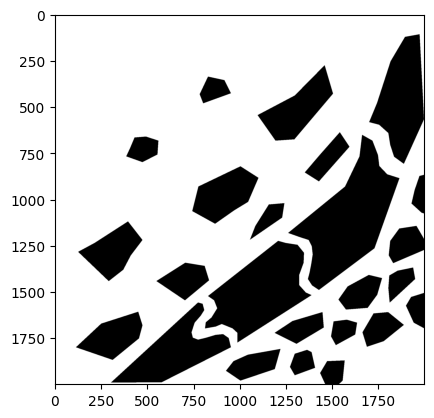

map_params\map_043_params.yaml
(2000, 2000)


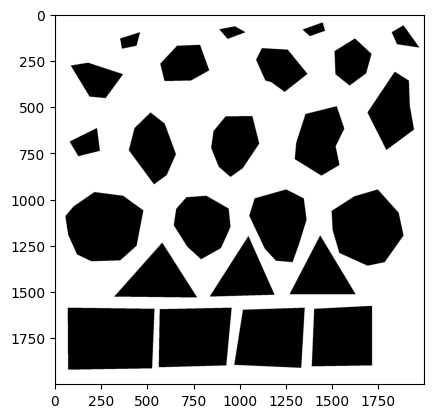

map_params\map_044_params.yaml
(2000, 2000)


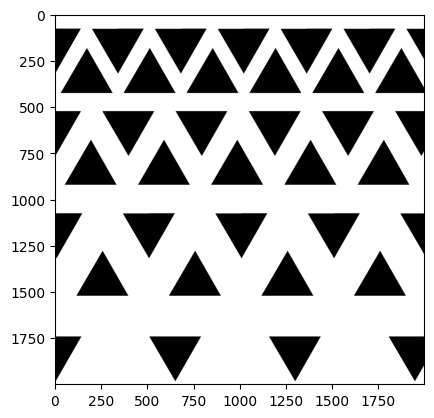

map_params\map_045_params.yaml
(4000, 4000)


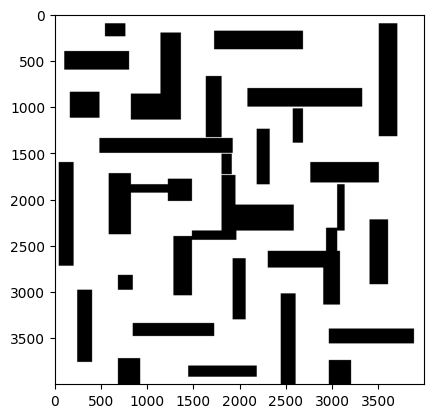

map_params\random_map_1_params.yaml
(1000, 1000)


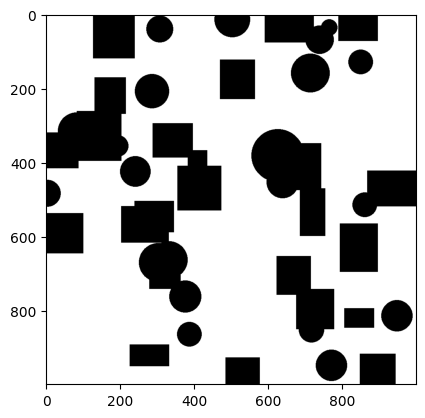

In [5]:
for file in os.listdir('map_params'):
    param_file = os.path.join('map_params', file)
    map_gen = MapGenerator(param_file)
    print(param_file)
    print(map_gen.map.get_map().shape)
    plt.imshow(map_gen.map.get_map(), cmap='gray')
    plt.show()

In [2]:
map_gen = MapGenerator('map_params/map_012_params.yaml')

(2000, 2000)


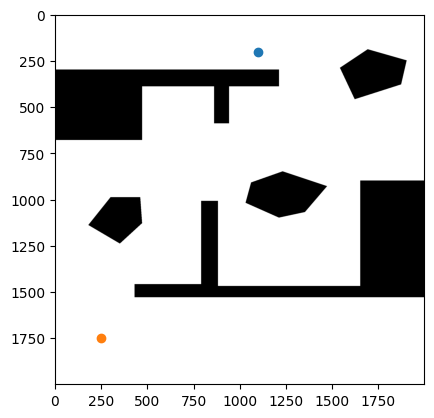

In [3]:
curr_map = map_gen.map.get_map()
start = np.array([1100, 200]).astype(np.int32)
end = np.array([250, 1750]).astype(np.int32)
plt.imshow(curr_map, cmap='gray')
plt.scatter([start[0]], [start[1]])
plt.scatter([end[0]], [end[1]])
print(curr_map.shape)
plt.show()

In [4]:
def cost_function(particles):
    global curr_map, start, end
    points = particles.reshape(-1, 2)
    points = (points * (np.array(curr_map.shape[::-1]) - 1)).astype(np.int32)
    path = linear_interpolation(start, end, points)
    cost = cost_func(path, curr_map, 10, 1)
    return cost

In [16]:
sols = list()
def test(x, y):
    print('Completed iteration', x+1)
    sols.append(y)

opt = GWOProblem(
    iteration_number=40,
    bees=20,
    particles=30,
    wolves=30,
    function=cost_function,
    points=3,
    iteration_callback=test,
    c_1=1.5,
    c_2=1.5,
    weight=0.5
)

In [17]:
best_sol = opt.solve()

Completed iteration 1
Completed iteration 2
Completed iteration 3
Completed iteration 4
Completed iteration 5
Completed iteration 6
Completed iteration 7
Completed iteration 8
Completed iteration 9
Completed iteration 10
Completed iteration 11
Completed iteration 12
Completed iteration 13
Completed iteration 14
Completed iteration 15
Completed iteration 16
Completed iteration 17
Completed iteration 18
Completed iteration 19
Completed iteration 20
Completed iteration 21
Completed iteration 22
Completed iteration 23
Completed iteration 24
Completed iteration 25
Completed iteration 26
Completed iteration 27
Completed iteration 28
Completed iteration 29
Completed iteration 30
Completed iteration 31
Completed iteration 32
Completed iteration 33
Completed iteration 34
Completed iteration 35
Completed iteration 36
Completed iteration 37
Completed iteration 38
Completed iteration 39
Completed iteration 40


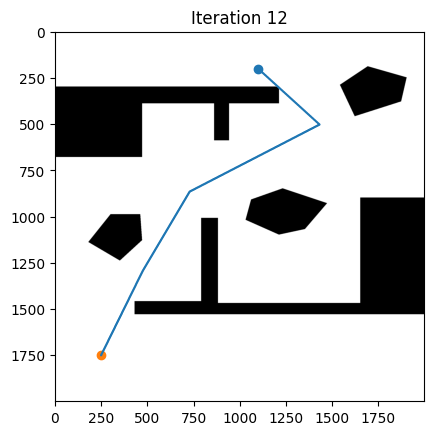

In [ ]:
itr = 1
for sol in sols:
    points = sol.reshape(-1, 2)
    points = (points * (np.array(curr_map.shape[::-1]) - 1)).astype(np.int32)
    path = linear_interpolation(start, end, points)
    fig = plt.figure()
    plt.title('Iteration %d' % itr)
    plt.imshow(curr_map, cmap='gray')
    plt.scatter([start[0]], [start[1]])
    plt.scatter([end[0]], [end[1]])
    plt.plot(path[:, 0], path[:, 1])
    display(fig)
    clear_output(wait = True)
    plt.pause(0.01)
    clear_output(wait = True)
    itr += 1